In [1]:
# packages

## Technical packages 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time
import random
import pandas as pd
import itertools
import scipy.stats
import math
import seaborn as sns

## Language packages
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import stopwords

In [2]:
########################################################
# Standard Functions
########################################################

def maketotal(dict_1):
    total = 0
    for item in dict_1:
        total += dict_1[item]
    return total  

def Jaccards(dict_1, dict_2):
    intersection = {} 
    for item in dict_1.keys():
        if item in dict_2.keys():
            intersection[item]=min(dict_1[item],dict_2[item])
            
    intersectiontot = maketotal(intersection)
    union = maketotal(dict_1) + maketotal(dict_2) - intersectiontot
    
    return intersectiontot/union

def time_it(somefunc,*arg,number_of_repeats=100,**kwarg):
    list_=[]

    #in each iteration the runtime of the function is noted and appended to a list
    for i in range(number_of_repeats):
        starttime = time.time()
        somefunc(*arg,**kwarg)
        endtime = time.time()
        list_.append(endtime-starttime)

    a = 0
    for i in list_:#finds the average of the list
        a += i

        mean = a/len(list_)

    return mean

In [44]:
# Generate variable leanght documents: 
class DocumentGenerator:
    def __init__(self,length = 1000,corpus = brown,include_filler_words = False,max_difference = False):
        if include_filler_words:
            self.word_reservoir = self.remove_punctuation(list(itertools.chain.from_iterable(corpus.sents()[:length]))) # does not remove stop words
        else:
            self.word_reservoir = self.remove_punctuation([word for word in list(itertools.chain.from_iterable(corpus.sents()[:length])) if word not in stopwords.words('english')]) # does remove stop words
        self.documents = []
        self.max_difference = max_difference
        print(len(self.word_reservoir))


    def generate_documents(self, no_doc = 10,min_length = 50,max_length = 150):
        document_length = [int(x) for x in np.linspace(min_length,max_length,no_doc)]

        for i in document_length:
            document_pairs = []

            doc_1 = []
            doc_2 = []

            while len(set(doc_1)) < i:
                doc_1.append(random.choices(self.word_reservoir,k=1)[0])

            while len(set(doc_2)) < i:
                if self.max_difference:
                    word = random.choices(self.word_reservoir,k=1)[0]
                    if word in doc_1:
                        continue
                    else:
                        doc_2.append(word)
                else:
                    doc_2.append(random.choices(self.word_reservoir,k=1)[0])

            document_pairs.append((self.tokenize(doc_1)))
            document_pairs.append((self.tokenize(doc_2)))
        
            self.documents.append(document_pairs)

        return self.documents
        

    @staticmethod
    def remove_punctuation(docs):
        for i in range(len(docs)):
            characters_to_remove = string.punctuation + string.digits 
            remove_table = str.maketrans('', '', characters_to_remove)
            docs[i] = docs[i].translate(remove_table)

        word_list = list(filter(None, docs))
        word_list = [x.lower() for x in word_list]

        return word_list

    @staticmethod
    def tokenize(l: list):
        tokenized_dict = {}
        for i in range(len(l)):
            if l[i] in tokenized_dict:
                pass
            else:
                tokenized_dict[l[i]] = l.count(l[i])
            
        return tokenized_dict

In [45]:
documents = DocumentGenerator(length=3000,include_filler_words=False, max_difference=True)
list_of_docs = documents.generate_documents(500,min_length=50,max_length=500)

34592


In [49]:
#############################################################################
# Printing the dictionary lengths and corresponding jaccard similarity values
#############################################################################

verbose = True

if verbose:
    for i in range(len(list_of_docs)):
        print(len(list_of_docs[i][0]),len(list_of_docs[i][1]))
        print(Jaccards(list_of_docs[i][0],list_of_docs[i][1]))
else:
    pass

50 50
1.0
50 50
1.0
51 51
1.0
52 52
1.0
53 53
1.0
54 54
1.0
55 55
1.0
56 56
1.0
57 57
1.0
58 58
1.0
59 59
1.0
59 59
1.0
60 60
1.0
61 61
1.0
62 62
1.0
63 63
1.0
64 64
1.0
65 65
1.0
66 66
1.0
67 67
1.0
68 68
1.0
68 68
1.0
69 69
1.0
70 70
1.0
71 71
1.0
72 72
1.0
73 73
1.0
74 74
1.0
75 75
1.0
76 76
1.0
77 77
1.0
77 77
1.0
78 78
1.0
79 79
1.0
80 80
1.0
81 81
1.0
82 82
1.0
83 83
1.0
84 84
1.0
85 85
1.0
86 86
1.0
86 86
1.0
87 87
1.0
88 88
1.0
89 89
1.0
90 90
1.0
91 91
1.0
92 92
1.0
93 93
1.0
94 94
1.0
95 95
1.0
95 95
1.0
96 96
1.0
97 97
1.0
98 98
1.0
99 99
1.0
100 100
1.0
101 101
1.0
102 102
1.0
103 103
1.0
104 104
1.0
105 105
1.0
105 105
1.0
106 106
1.0
107 107
1.0
108 108
1.0
109 109
1.0
110 110
1.0
111 111
1.0
112 112
1.0
113 113
1.0
114 114
1.0
114 114
1.0
115 115
1.0
116 116
1.0
117 117
1.0
118 118
1.0
119 119
1.0
120 120
1.0
121 121
1.0
122 122
1.0
123 123
1.0
123 123
1.0
124 124
1.0
125 125
1.0
126 126
1.0
127 127
1.0
128 128
1.0
129 129
1.0
130 130
1.0
131 131
1.0
132 132
1.0
132 132


In [50]:
########################################################################################################
# Emperical Analysis: calculate time it takes to calculate Jaccards Similarity for different bag lenghts
########################################################################################################

jaccard_xs = []
jaccard_ys = []

for i in range(len(list_of_docs)):
    jaccard_ys.append(time_it(Jaccards, list_of_docs[i][0],list_of_docs[i][1]))
    jaccard_xs.append(max((len(list_of_docs[i][0]),len(list_of_docs[i][1]))))



The empirical Analysis of the Jaccard Similarity has yielded a value of 0.9394337751260398 for the slope and a value of 4.857587906573602e-15 for the computer constant.


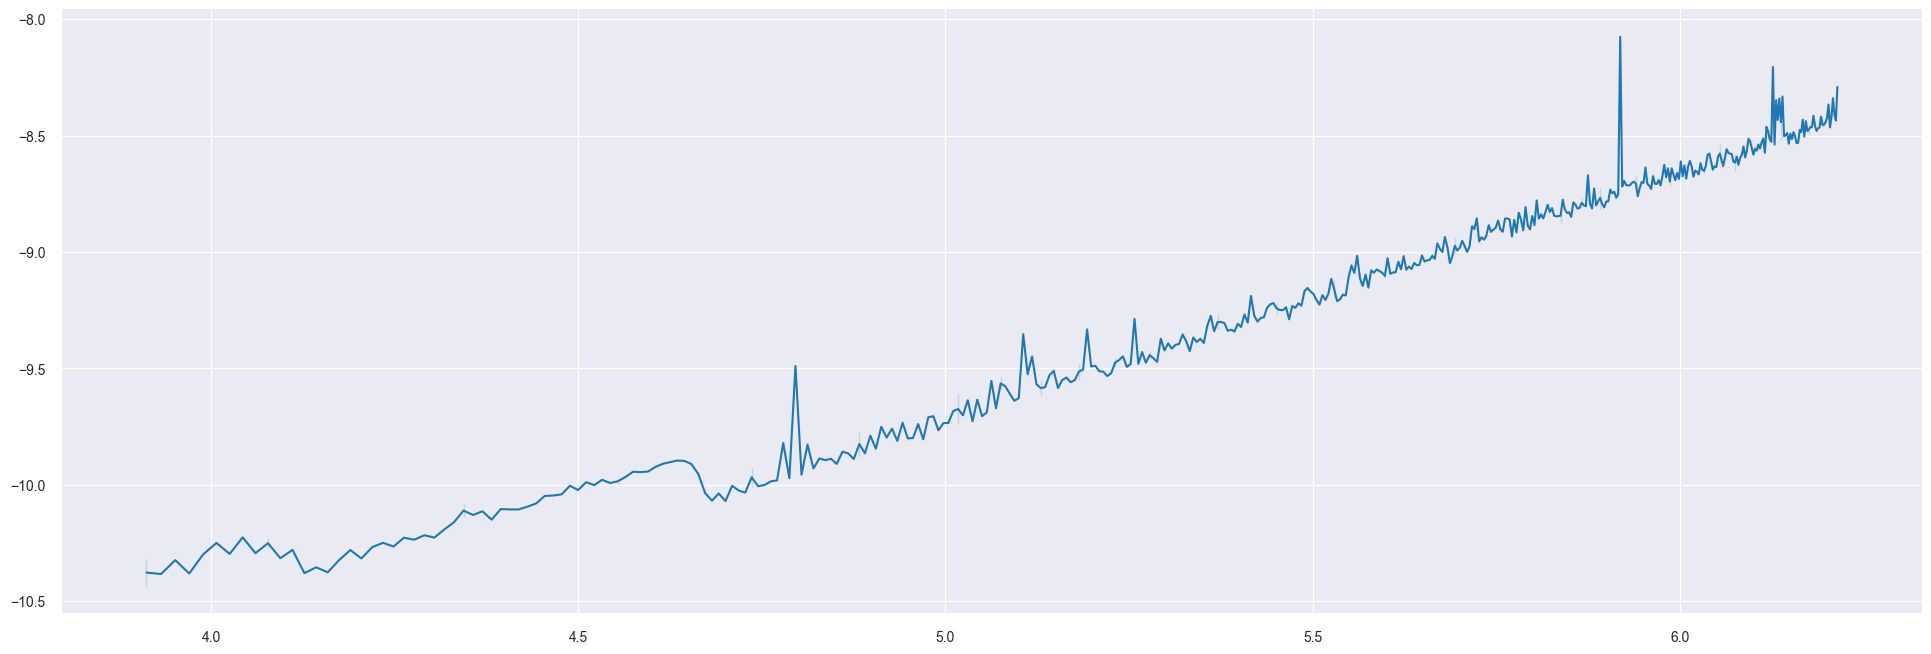

In [52]:
########################################################
# Plotting the results and summary staistics
########################################################


logx = [np.log(x) for x in jaccard_xs]
logy = [np.log(y) for y in jaccard_ys]

plt.figure(figsize=(24,8),dpi=100)
sns.set_style("darkgrid")
sns.lineplot(x=logx, y=logy)
sns.despine(offset=5,trim=True)

slope_jaccard,intercept, r_value, p_value ,std_err = scipy.stats.linregress(logx,logy)
computer_constant = np.power(10,intercept)

print(f'The empirical Analysis of the Jaccard Similarity has yielded a value of {slope_jaccard} for the slope and a value of {computer_constant} for the computer constant.')

In [ ]:
# Analysis Text here: 